<a href="https://colab.research.google.com/github/juniperlovato/DiverseMisinformationPaper/blob/main/Bootstrapping_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook generates bootstrap samples from two confusions matrices and compares their MCC scores. We use it to test the significance of biases in results of Lovato et al. (2022).

##Imports and installs

In [ ]:
import numpy as np
import scipy
from scipy.stats import spearmanr
from scipy.stats import ttest_ind

In [ ]:
#for latex in matpliotlib
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

##Functions for bootstraping and difference of mean test

In [ ]:
#function that generates a bootstraped sampled of correlation coefficients
#input: confusion matrix as 4 parameters
#output an array of 10,000 correlation coefficient
def generate_corrcoeff(TP,FN,FP,TN):
  norm = TP+FN+FP+TN
  corrcoeff = []
  for repetition in range(10000):
    a = []
    b = []
    for data in range(norm):
      rn = np.random.randint(norm)
      if rn<TP:
        a.append(1)
        b.append(1)
      elif rn<TP+FN:
        a.append(0)
        b.append(1)
      elif rn<TP+FN+FP:
        a.append(1)
        b.append(0)
      else:
        a.append(0)
        b.append(0)
    corrcoeff.append(scipy.stats.spearmanr(a,b)[0])
  return corrcoeff

In [ ]:
from matplotlib import pyplot

def visualize_bootstrap(array1,label1,array2,label2,label):
  pyplot.rcParams['text.usetex']       = True
  pyplot.rcParams['font.size']         = 14
  pyplot.rcParams['font.family']       = 'serif'
  pyplot.rcParams['font.serif']        = 'Computer Modern Roman'
  pyplot.rcParams['xtick.major.width'] = 2
  pyplot.rcParams['xtick.major.size']  = 8
  pyplot.rcParams['ytick.major.width'] = 2
  pyplot.rcParams['ytick.major.size']  = 8

  bins = np.linspace(-1, 1, 100)

  pyplot.hist(array1, bins, alpha=0.5, label=label1)
  pyplot.hist(array2, bins, alpha=0.5, label=label2)
  pyplot.legend(loc='upper right')
  pyplot.xlabel(r'MCC')
  pyplot.ylabel(r'Bootstrap counts')
  pyplot.text(-0.9,1400,label)
  pyplot.ylim(0,1500)
  pyplot.xlim(-1,1)
  pyplot.show()

In [ ]:
def find_confidence(array):
  array_has_nan = np.isnan(np.sum(array))
  if array_has_nan:
    return(np.sum(array))
  for quant in np.arange(0.000,1.0,0.001):
    res = np.quantile(array, quant)
    if res>0:
      return(quant - 0.001)
      break
  return(quant)

def plot_difference_of_MCC(array1,array2,label1,label2):

  #subtract correlation coefficients from one another
  array = np.subtract(array1,array2)

  #calculate where 0 falls in the resulting quantiles
  confidence = find_confidence(array)
  #express confidence as a "probability" that the null can be rejected
  if confidence<0.5:
    confidence = 1-confidence

  #fix confidence format
  conf_str = f'{confidence:.2f}'

  #Visualize this test
  pyplot.rcParams['text.usetex']       = True
  pyplot.rcParams['font.size']         = 14
  pyplot.rcParams['font.family']       = 'serif'
  pyplot.rcParams['font.serif']        = 'Computer Modern Roman'
  pyplot.rcParams['xtick.major.width'] = 2
  pyplot.rcParams['xtick.major.size']  = 8
  pyplot.rcParams['ytick.major.width'] = 2
  pyplot.rcParams['ytick.major.size']  = 8
  bins = np.linspace(-1, 1, 100)
  pyplot.hist(array, bins, alpha=0.5, label=label1)
  pyplot.vlines(0, 0, 1500, colors='k', linestyles='--')
  pyplot.text(-0.9,1400,label2)
  pyplot.ylim(0,1500)
  pyplot.xlim(-1,1)
  pyplot.legend(loc='upper right')
  pyplot.xlabel(r'Difference of MCC')
  pyplot.ylabel(r'Bootstrap counts')
  pyplot.text(0.26,1150,'Confidence = %s'%(conf_str))
  pyplot.show()

Generate and compare bootstrap samples for two *independent* categories to be compared

##Bias per Age

Ttest_indResult(statistic=-7.8360501949033425, pvalue=4.881935819379628e-15)


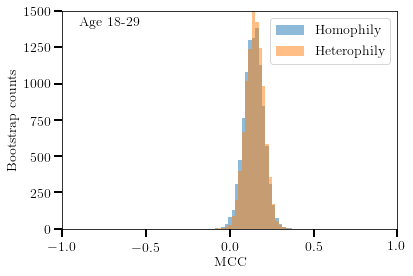

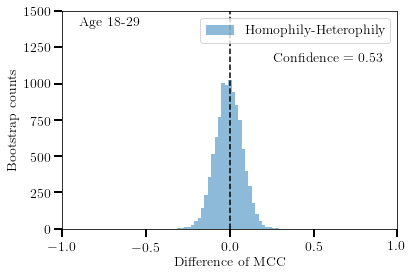

In [ ]:
# Age1829_Heterophily	"[[138 41]
#   [106 61]]"
# Age1829_Homophily	"[[111 26]
#   [ 98 45]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo1829 = generate_corrcoeff(111,26,98,45)
bootstrap_hetero1829 = generate_corrcoeff(138,41,106,61)

result_bias_1829 = ttest_ind(bootstrap_homo1829,bootstrap_hetero1829,equal_var=False)
print(result_bias_1829)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo1829,'Homophily',bootstrap_hetero1829,'Heterophily', 'Age 18-29')
plot_difference_of_MCC(bootstrap_homo1829,bootstrap_hetero1829,'Homophily-Heterophily', 'Age 18-29')

Ttest_indResult(statistic=-86.99356987468974, pvalue=0.0)


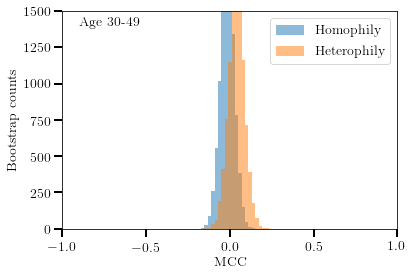

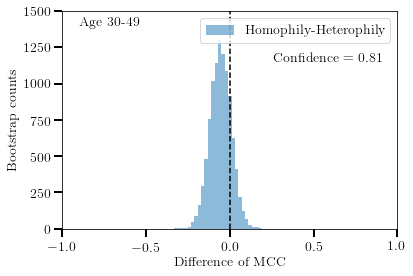

In [ ]:
# Age3049_Heterophily	"[[171 52]
#   [161 59]]"
# Age304_Homophily	"[[221 64]
#   [230 62]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo3049 = generate_corrcoeff(221,64,230,62)
bootstrap_hetero3049 = generate_corrcoeff(171,52,161,59)

result_bias_3049 = ttest_ind(bootstrap_homo3049,bootstrap_hetero3049,equal_var=False)
print(result_bias_3049)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo3049,'Homophily',bootstrap_hetero3049,'Heterophily', 'Age 30-49')
plot_difference_of_MCC(bootstrap_homo3049,bootstrap_hetero3049,'Homophily-Heterophily', 'Age 30-49')

Ttest_indResult(statistic=109.053550811611, pvalue=0.0)


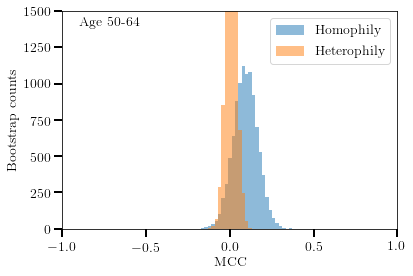

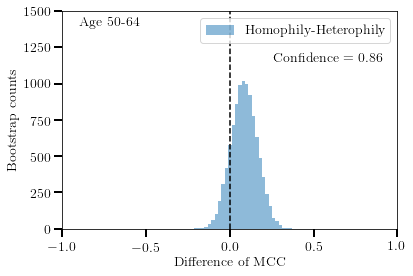

In [ ]:
# Age5064_Heterophily	"[[359 117]
#   [331 112]]"
# Age5064_Homophily	"[[80 23]
#   [68 30]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo5064 = generate_corrcoeff(80,23,68,30)
bootstrap_hetero5064 = generate_corrcoeff(359,117,331,112)

result_bias_5064 = ttest_ind(bootstrap_homo5064,bootstrap_hetero5064,equal_var=False)
print(result_bias_5064)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo5064,'Homophily',bootstrap_hetero5064,'Heterophily', 'Age 50-64')
plot_difference_of_MCC(bootstrap_homo5064,bootstrap_hetero5064,'Homophily-Heterophily', 'Age 50-64')

Ttest_indResult(statistic=68.74401763860082, pvalue=0.0)


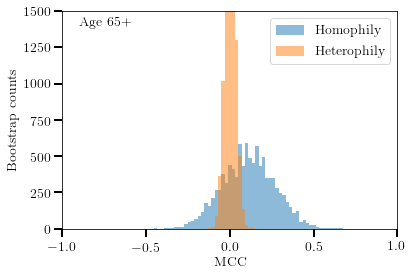

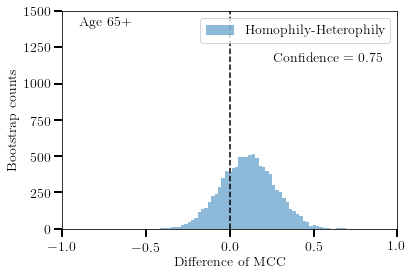

In [ ]:
# Age65plus_Heterophily	"[[353 161]
#   [338 156]]"
# Age65plus_Homophily	"[[20 6]
#   [12 6]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo65p = generate_corrcoeff(20,6,12,6)
bootstrap_hetero65p= generate_corrcoeff(353,161,338,156)

result_bias_65p = ttest_ind(bootstrap_homo65p,bootstrap_hetero65p,equal_var=False)
print(result_bias_65p)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo65p,'Homophily',bootstrap_hetero65p,'Heterophily', 'Age 65+')
plot_difference_of_MCC(bootstrap_homo65p,bootstrap_hetero65p,'Homophily-Heterophily', 'Age 65+')

##Bias per Gender and Race

Ttest_indResult(statistic=65.86693928118882, pvalue=0.0)


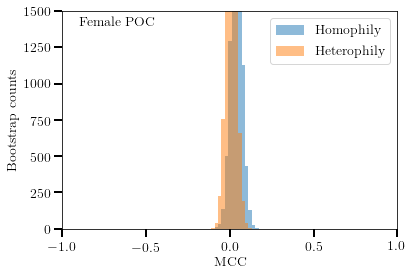

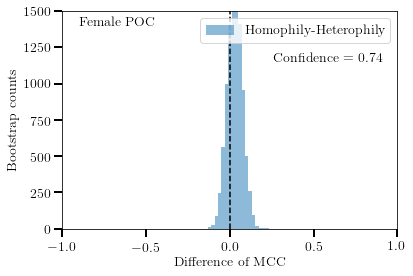

In [ ]:
# FemalePOC_Heterophily	"[[398 137]
#   [398 143]]"
# FemalePOC_Homophily	"[[357 108]
#   [322 117]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoFPOC = generate_corrcoeff(357,108,322,117)
bootstrap_heteroFPOC= generate_corrcoeff(398,137,398,143)

result_bias_FPOC = ttest_ind(bootstrap_homoFPOC,bootstrap_heteroFPOC,equal_var=False)
print(result_bias_FPOC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoFPOC,'Homophily',bootstrap_heteroFPOC,'Heterophily', 'Female POC')
plot_difference_of_MCC(bootstrap_homoFPOC,bootstrap_heteroFPOC,'Homophily-Heterophily', 'Female POC')

Ttest_indResult(statistic=-68.52043673658744, pvalue=0.0)


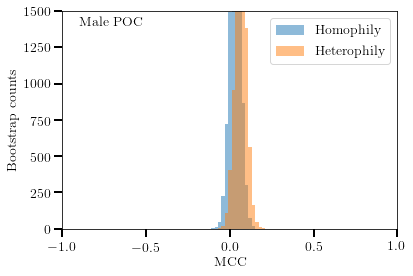

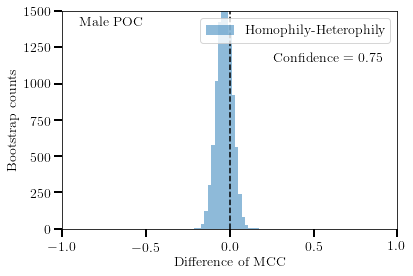

In [ ]:
# MalePOC_Heterophily	"[[346 120]
#   [295 136]]"
# MalePOC_Homophily	"[[352 125]
#   [329 135]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoMPOC = generate_corrcoeff(352,125,329,135)
bootstrap_heteroMPOC= generate_corrcoeff(346,120,295,136)

result_bias_MPOC = ttest_ind(bootstrap_homoMPOC,bootstrap_heteroMPOC,equal_var=False)
print(result_bias_MPOC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoMPOC,'Homophily',bootstrap_heteroMPOC,'Heterophily', 'Male POC')
plot_difference_of_MCC(bootstrap_homoMPOC,bootstrap_heteroMPOC,'Homophily-Heterophily', 'Male POC')

Ttest_indResult(statistic=-159.77898216791044, pvalue=0.0)


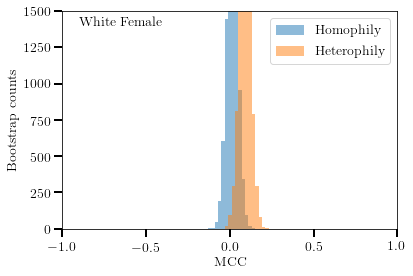

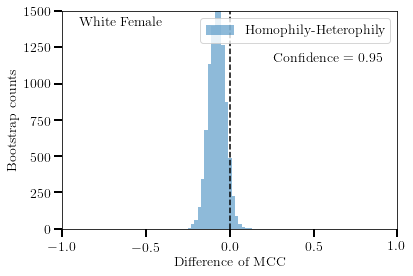

In [ ]:
# WhiteFemale_Heterophily	"[[318 102]
#   [288 139]]"
# WhiteFemale_Homophily	"[[344 121]
#   [317 119]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoWF = generate_corrcoeff(344,121,317,119)
bootstrap_heteroWF= generate_corrcoeff(318,102,288,139)

result_bias_WF = ttest_ind(bootstrap_homoWF,bootstrap_heteroWF,equal_var=False)
print(result_bias_WF)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoWF,'Homophily',bootstrap_heteroWF,'Heterophily', 'White Female')
plot_difference_of_MCC(bootstrap_homoWF,bootstrap_heteroWF,'Homophily-Heterophily', 'White Female')

Ttest_indResult(statistic=0.8437654760559338, pvalue=0.39881062673490586)


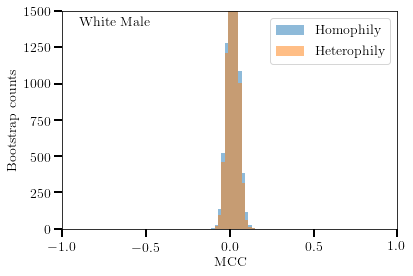

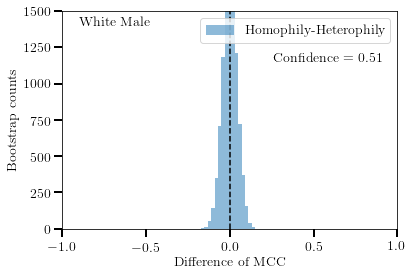

In [ ]:
# WhiteMale_Heterophily	"[[406 151]
#   [405 163]]"
# WhiteMale_Homophily	"[[385 116]
#   [334 110]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoWM = generate_corrcoeff(385,116,334,110)
bootstrap_heteroWM= generate_corrcoeff(406,151,405,163)

result_bias_WM = ttest_ind(bootstrap_homoWM,bootstrap_heteroWM,equal_var=False)
print(result_bias_WM)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoWM,'Homophily',bootstrap_heteroWM,'Heterophily', 'White Male')
plot_difference_of_MCC(bootstrap_homoWM,bootstrap_heteroWM,'Homophily-Heterophily', 'White Male')

##Bias per Prior Knowledge and Social Media Usage

Ttest_indResult(statistic=164.79942678389475, pvalue=0.0)


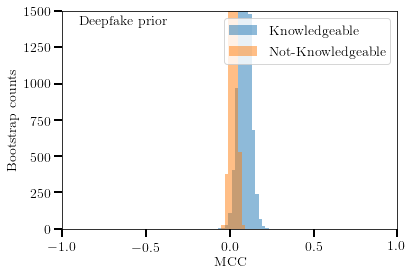

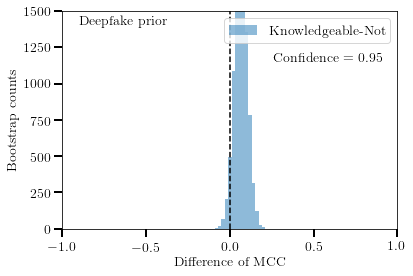

In [ ]:
# Knowledgeable_about_deepfakes	"[[310 91]
#   [271 118]]"
# Not_Knowledgeable_about_deepfakes	"[[1143 399]
#   [1073 413]]"

#Argument key: TP,FN,FP,TN
bootstrap_K = generate_corrcoeff(310,91,271,118)
bootstrap_NK= generate_corrcoeff(1143,399,1073,413)

result_bias_K = ttest_ind(bootstrap_K,bootstrap_NK,equal_var=False)
print(result_bias_K)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_K,'Knowledgeable',bootstrap_NK,'Not-Knowledgeable', 'Deepfake prior')
plot_difference_of_MCC(bootstrap_K,bootstrap_NK,'Knowledgeable-Not', 'Deepfake prior')

Ttest_indResult(statistic=92.0573432371318, pvalue=0.0)


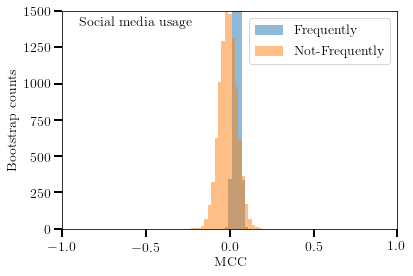

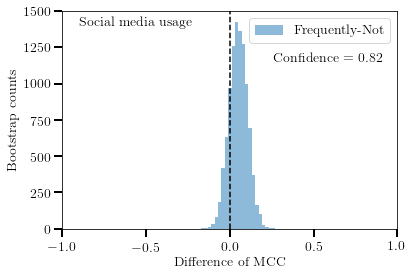

In [ ]:
# social_media_frequently	"[[1321 1227]
#   [ 429 479]]"
# social_media_infrequently	"[[132 117]
#   [ 61 52]]"

#Argument key: TP,FN,FP,TN
bootstrap_F = generate_corrcoeff(1321,1227,429,479)
bootstrap_NF= generate_corrcoeff(132,117,61,52)

result_bias_F = ttest_ind(bootstrap_F,bootstrap_NF,equal_var=False)
print(result_bias_F)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_F,'Frequently',bootstrap_NF,'Not-Frequently', 'Social media usage')
plot_difference_of_MCC(bootstrap_F,bootstrap_NF,'Frequently-Not', 'Social media usage')

##By new categories

Ttest_indResult(statistic=42.18661831252332, pvalue=0.0)


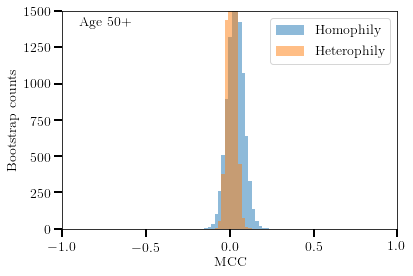

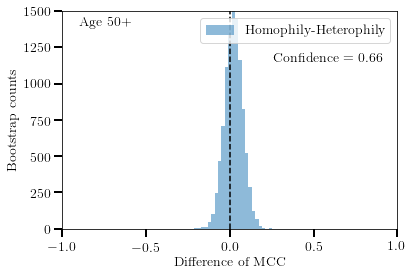

In [ ]:
# Age50Plus_Heterophily	"[[646 248]
#   [602 243]]"
# Age50Plus_Homophily	"[[166 59]
#   [147 61]]"

#Argument key: TP,FN,FP,TN
bootstrap_homo50p = generate_corrcoeff(166,59,147,61)
bootstrap_hetero50p = generate_corrcoeff(646,248,602,243)

result_bias_50p = ttest_ind(bootstrap_homo50p,bootstrap_hetero50p,equal_var=False)
print(result_bias_50p)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homo50p,'Homophily',bootstrap_hetero50p,'Heterophily', 'Age 50+')
plot_difference_of_MCC(bootstrap_homo50p,bootstrap_hetero50p,'Homophily-Heterophily', 'Age 50+')

Ttest_indResult(statistic=12.377330373799511, pvalue=4.660067929794214e-35)


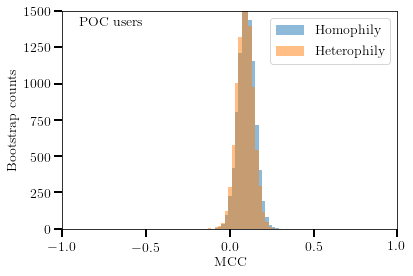

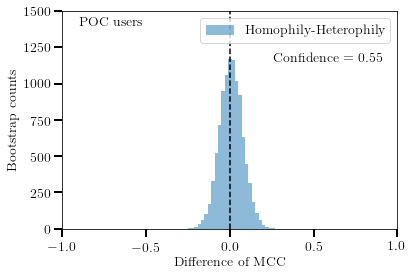

In [ ]:
# PersonofColor_Heterophily	"[[144 50]
#   [149 77]]"
# PersonofColor_Homophily	"[[182 48]
#   [134 56]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoPOC = generate_corrcoeff(182,48,134,56)
bootstrap_heteroPOC = generate_corrcoeff(144,50,149,77)

result_bias_POC = ttest_ind(bootstrap_homoPOC,bootstrap_heteroPOC,equal_var=False)
print(result_bias_POC)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoPOC,'Homophily',bootstrap_heteroPOC,'Heterophily', 'POC users')
plot_difference_of_MCC(bootstrap_homoPOC,bootstrap_heteroPOC,'Homophily-Heterophily', 'POC users')

Ttest_indResult(statistic=288.11359454852834, pvalue=0.0)


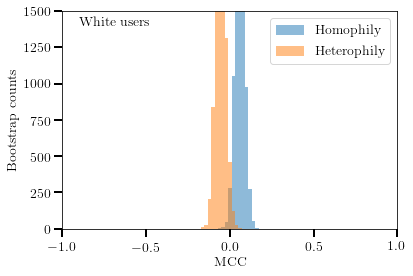

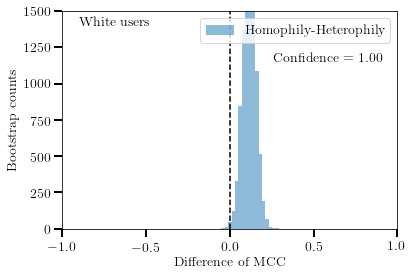

In [ ]:
# White_Heterophily	"[[473 179]
#   [397 116]]"
# White_Homophily	"[[458 149]
#   [485 207]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoW = generate_corrcoeff(458,149,485,207)
bootstrap_heteroW = generate_corrcoeff(473,179,397,116)

result_bias_W = ttest_ind(bootstrap_homoW,bootstrap_heteroW,equal_var=False)
print(result_bias_W)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoW,'Homophily',bootstrap_heteroW,'Heterophily', 'White users')
plot_difference_of_MCC(bootstrap_homoW,bootstrap_heteroW,'Homophily-Heterophily', 'White users')

Ttest_indResult(statistic=74.76281490258143, pvalue=0.0)


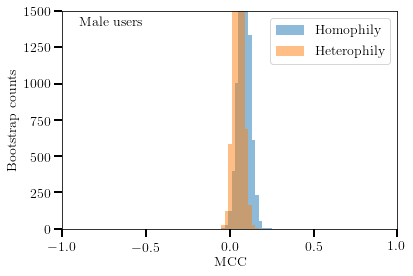

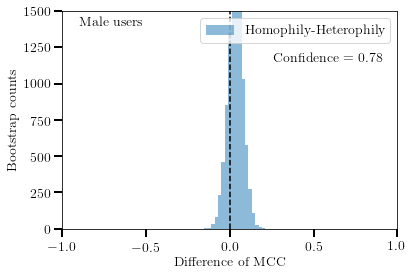

In [ ]:
# Male_Heterophily	"[[483 142]
#   [451 168]]"
# Male_Homophily	"[[342 105]
#   [282 127]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoMale = generate_corrcoeff(342,105,282,127)
bootstrap_heteroMale = generate_corrcoeff(483,142,451,168)

result_bias_Male = ttest_ind(bootstrap_homoMale,bootstrap_heteroMale,equal_var=False)
print(result_bias_Male)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoMale,'Homophily',bootstrap_heteroMale,'Heterophily', 'Male users')
plot_difference_of_MCC(bootstrap_homoMale,bootstrap_heteroMale,'Homophily-Heterophily', 'Male users')

Ttest_indResult(statistic=-61.120978512574624, pvalue=0.0)


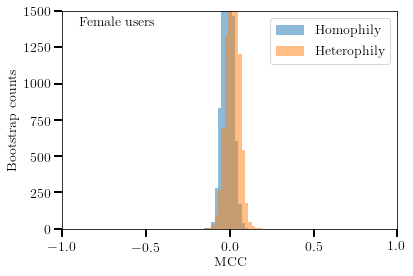

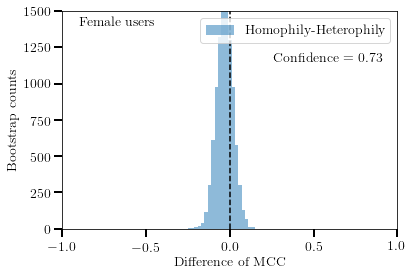

In [ ]:
# Female_Heterophily	"[[241 97]
#   [240 104]]"
# Female_Homophily	"[[387 146]
#   [371 132]]"

#Argument key: TP,FN,FP,TN
bootstrap_homoFemale = generate_corrcoeff(387,146,371,132)
bootstrap_heteroFemale = generate_corrcoeff(241,97,240,104)

result_bias_Female = ttest_ind(bootstrap_homoFemale,bootstrap_heteroFemale,equal_var=False)
print(result_bias_Female)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_homoFemale,'Homophily',bootstrap_heteroFemale,'Heterophily', 'Female users')
plot_difference_of_MCC(bootstrap_homoFemale,bootstrap_heteroFemale,'Homophily-Heterophily', 'Female users')

#comparing different basleines

Ttest_indResult(statistic=200.75533397275422, pvalue=0.0)


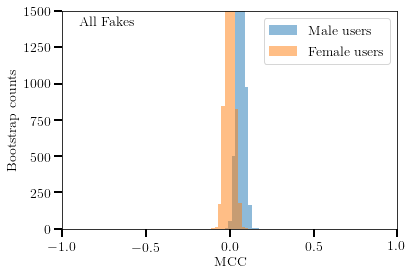

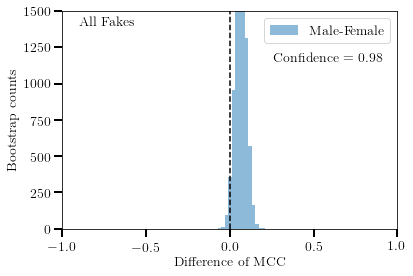

In [ ]:
#Argument key: TP,FN,FP,TN
# Male_baseline	"[[825 247]
#   [733 295]]"
# Female_baseline	"[[628 243]
#   [611 236]]"

bootstrap_Male = generate_corrcoeff(825,247,733,295)
bootstrap_Female = generate_corrcoeff(628,243,611,236)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'All Fakes')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'All Fakes')

Ttest_indResult(statistic=151.9964710086868, pvalue=0.0)


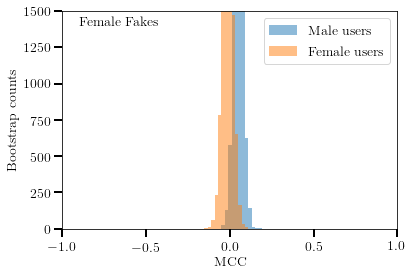

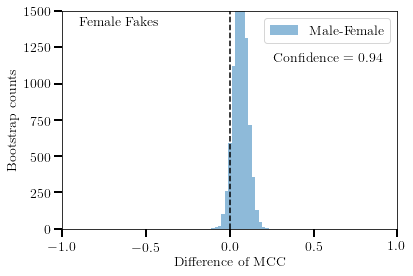

In [ ]:
#Argument key: TP,FN,FP,TN
# Male_with_female_fakes	"[[483 142]
#   [451 168]]"
# Female_with_female_fakes	"[[387 146]
#   [371 132]]"

bootstrap_Male = generate_corrcoeff(483,142,451,168)
bootstrap_Female = generate_corrcoeff(387,146,371,132)

result_bias_Gender = ttest_ind(bootstrap_Male,bootstrap_Female,equal_var=False)
print(result_bias_Gender)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Male,'Male users',bootstrap_Female,'Female users', 'Female Fakes')
plot_difference_of_MCC(bootstrap_Male,bootstrap_Female,'Male-Female', 'Female Fakes')

Ttest_indResult(statistic=-226.84446800145582, pvalue=0.0)


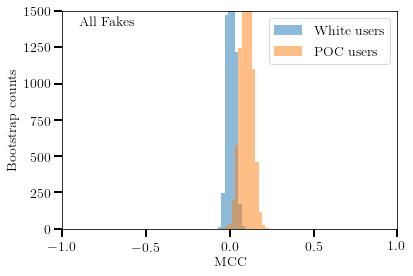

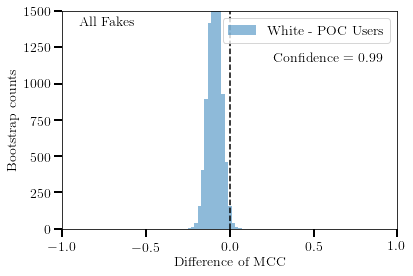

In [ ]:
#Argument key: TP,FN,FP,TN
# PersonofColor_baseline	"[[326 98]
#   [283 133]]"
# White_baseline	"[[931 328]
#   [882 323]]"

bootstrap_White = generate_corrcoeff(931,328,882,323)
bootstrap_POC = generate_corrcoeff(326,98,283,133)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'All Fakes')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White - POC Users', 'All Fakes')

Ttest_indResult(statistic=-272.9129730176936, pvalue=0.0)


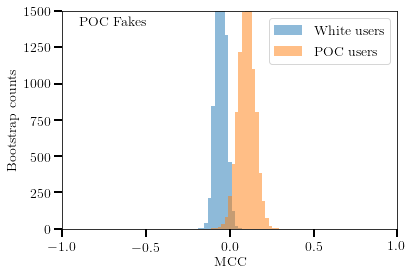

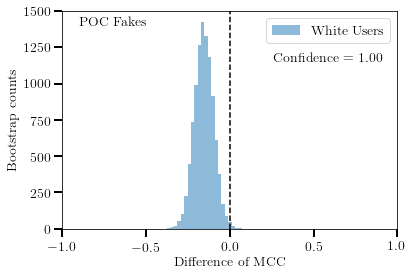

In [ ]:
#Argument key: TP,FN,FP,TN
# PersonofColor_with_POC_fake	"[[182 48]
#   [134 56]]"
# White_with_POC_fake	""[[473 179]
#   [397 116]]"


bootstrap_White = generate_corrcoeff(473,179,397,116)
bootstrap_POC = generate_corrcoeff(182,48,134,56)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'POC Fakes')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White-POC Users', 'POC Fakes')

Ttest_indResult(statistic=-53.78150384287317, pvalue=0.0)


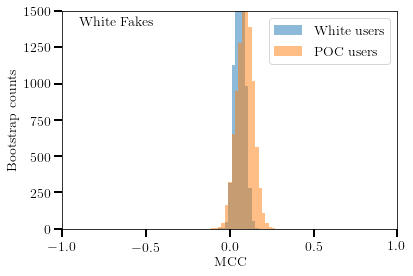

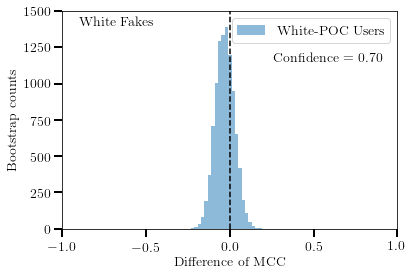

In [ ]:
#Argument key: TP,FN,FP,TN
# PersonofColor_with_White_fake	"[[144 50]
#   [149 77]]"
# White_with_White_fake	 "[[458 149]
#   [485 207]]"


bootstrap_White = generate_corrcoeff(458,149,485,207)
bootstrap_POC = generate_corrcoeff(144,50,149,77)

result_bias_race = ttest_ind(bootstrap_White,bootstrap_POC,equal_var=False)
print(result_bias_race)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_White,'White users',bootstrap_POC,'POC users', 'White Fakes')
plot_difference_of_MCC(bootstrap_White,bootstrap_POC,'White-POC Users', 'White Fakes')

Ttest_indResult(statistic=287.826057131176, pvalue=0.0)


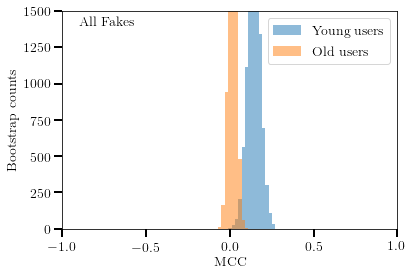

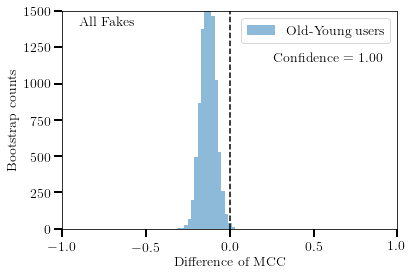

In [ ]:
#Argument key: TP,FN,FP,TN
# Age1829_Baseline	"[[249 67]
#   [204 106]]"
# Age3049_Baseline	"[[392 116]
#   [391 121]]"
#   Age50Plus_baseline	"[[812 307]
#   [749 304]]"


bootstrap_Young = generate_corrcoeff(249,67,204,106)
bootstrap_Old = generate_corrcoeff(812,307,749,304)

result_bias_age = ttest_ind(bootstrap_Young,bootstrap_Old,equal_var=False)
print(result_bias_age)

#Argument key:  array and label, demographic array
visualize_bootstrap(bootstrap_Young,'Young users',bootstrap_Old,'Old users', 'All Fakes')
plot_difference_of_MCC(bootstrap_Old,bootstrap_Young,'Old-Young users', 'All Fakes')